# Import data from TXT files

In [4]:
import time
start_time = time.process_time()

import pandas as pd
df_ps1 = pd.read_csv("data/PS1.txt", header=None, sep='\t')
df_ps2 = pd.read_csv("data/PS2.txt", header=None, sep='\t')
df_ps3 = pd.read_csv("data/PS3.txt", header=None, sep='\t')
df_ps4 = pd.read_csv("data/PS4.txt", header=None, sep='\t')
df_ps5 = pd.read_csv("data/PS5.txt", header=None, sep='\t')
df_ps6 = pd.read_csv("data/PS6.txt", header=None, sep='\t')
df_eps1 = pd.read_csv("data/EPS1.txt", header=None, sep='\t')
df_fs1 = pd.read_csv("data/FS1.txt", header=None, sep='\t')
df_fs2 = pd.read_csv("data/FS2.txt", header=None, sep='\t')
df_ts1 = pd.read_csv("data/TS1.txt", header=None, sep='\t')
df_ts2 = pd.read_csv("data/TS2.txt", header=None, sep='\t')
df_ts3 = pd.read_csv("data/TS3.txt", header=None, sep='\t')
df_ts4 = pd.read_csv("data/TS4.txt", header=None, sep='\t')
df_vs1 = pd.read_csv("data/VS1.txt", header=None, sep='\t')
df_ce = pd.read_csv("data/CE.txt", header=None, sep='\t')
df_cp = pd.read_csv("data/CP.txt", header=None, sep='\t')
df_se = pd.read_csv("data/SE.txt", header=None, sep='\t')
df_profile = pd.read_csv("data/profile.txt", header=None, sep='\t')

end_time = time.process_time()
print(end_time - start_time, "seconds")

50.21875 seconds


In [5]:
data_list = [
    df_ps1, df_ps2, df_ps3, df_ps4, df_ps5, df_ps6, df_eps1, df_fs1, df_fs2,
    df_ts1, df_ts2, df_ts3, df_ts4, df_vs1, df_ce, df_cp, df_se, df_profile
]

for x in data_list:
    print(x.shape)

(2205, 6000)
(2205, 6000)
(2205, 6000)
(2205, 6000)
(2205, 6000)
(2205, 6000)
(2205, 6000)
(2205, 600)
(2205, 600)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 60)
(2205, 5)


In [6]:
'''
Attribute Information:
The data set contains raw process sensor data (i.e. without feature extraction) which 
are structured as matrices (tab-delimited) with the rows representing the cycles and 
the columns the data points within a cycle. The sensors involved are:

Sensor Physical quantity Unit Sampling rate
PS1 Pressure bar 100 Hz
PS2 Pressure bar 100 Hz
PS3 Pressure bar 100 Hz
PS4 Pressure bar 100 Hz
PS5 Pressure bar 100 Hz
PS6 Pressure bar 100 Hz
EPS1 Motor power W 100 Hz
FS1 Volume flow l/min 10 Hz
FS2 Volume flow l/min 10 Hz
TS1 Temperature Â°C 1 Hz
TS2 Temperature Â°C 1 Hz
TS3 Temperature Â°C 1 Hz
TS4 Temperature Â°C 1 Hz
VS1 Vibration mm/s 1 Hz
CE Cooling efficiency (virtual) % 1 Hz
CP Cooling power (virtual) kW 1 Hz
SE Efficiency factor % 1 Hz
'''

'\nAttribute Information:\nThe data set contains raw process sensor data (i.e. without feature extraction) which \nare structured as matrices (tab-delimited) with the rows representing the cycles and \nthe columns the data points within a cycle. The sensors involved are:\n\nSensor Physical quantity Unit Sampling rate\nPS1 Pressure bar 100 Hz\nPS2 Pressure bar 100 Hz\nPS3 Pressure bar 100 Hz\nPS4 Pressure bar 100 Hz\nPS5 Pressure bar 100 Hz\nPS6 Pressure bar 100 Hz\nEPS1 Motor power W 100 Hz\nFS1 Volume flow l/min 10 Hz\nFS2 Volume flow l/min 10 Hz\nTS1 Temperature Â°C 1 Hz\nTS2 Temperature Â°C 1 Hz\nTS3 Temperature Â°C 1 Hz\nTS4 Temperature Â°C 1 Hz\nVS1 Vibration mm/s 1 Hz\nCE Cooling efficiency (virtual) % 1 Hz\nCP Cooling power (virtual) kW 1 Hz\nSE Efficiency factor % 1 Hz\n'

In [50]:
# Assigning column headers to df_profile

profile_headers = [
    'Cooler', 'Valve', 'Internal pump leakage',
    'Hydraulic accumulator', 'stable flag'
]

df_profile.columns = profile_headers
df_profile

,Cooler,Valve,Internal pump leakage,Hydraulic accumulator,stable flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1
...,...,...,...,...,...
2200,100,100,0,90,0
2201,100,100,0,90,0
2202,100,100,0,90,0
2203,100,100,0,90,0


In [8]:
'''

The target condition values are cycle-wise annotated in â€˜profile.txtâ€˜ (tab-delimited).
As before, the row number represents the cycle number. The columns are

1: Cooler condition / %:
3: close to total failure
20: reduced effifiency
100: full efficiency

2: Valve condition / %:
100: optimal switching behavior
90: small lag
80: severe lag
73: close to total failure

3: Internal pump leakage:
0: no leakage
1: weak leakage
2: severe leakage

4: Hydraulic accumulator / bar:
130: optimal pressure
115: slightly reduced pressure
100: severely reduced pressure
90: close to total failure

5: stable flag:
0: conditions were stable
1: static conditions might not have been reached yet

'''

'\n\nThe target condition values are cycle-wise annotated in â€˜profile.txtâ€˜ (tab-delimited).\nAs before, the row number represents the cycle number. The columns are\n\n1: Cooler condition / %:\n3: close to total failure\n20: reduced effifiency\n100: full efficiency\n\n2: Valve condition / %:\n100: optimal switching behavior\n90: small lag\n80: severe lag\n73: close to total failure\n\n3: Internal pump leakage:\n0: no leakage\n1: weak leakage\n2: severe leakage\n\n4: Hydraulic accumulator / bar:\n130: optimal pressure\n115: slightly reduced pressure\n100: severely reduced pressure\n90: close to total failure\n\n5: stable flag:\n0: conditions were stable\n1: static conditions might not have been reached yet\n\n'

In [46]:
import inspect


def retrieve_name(var):
        """
        Gets the name of var. Does it from the out most frame inner-wards.
        :param var: variable to get name from.
        :return: string
        """
        for fi in reversed(inspect.stack()):
            names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
            if len(names) > 0:
                return names[0]


# Visualisation

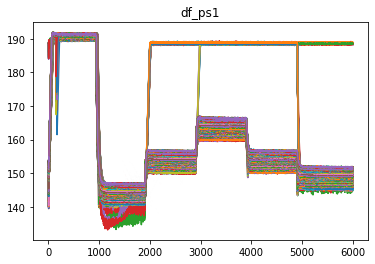

12.921875 seconds


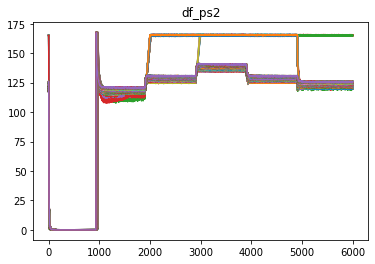

12.3125 seconds


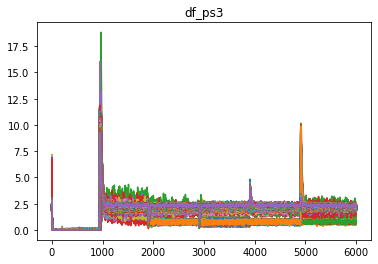

12.9375 seconds


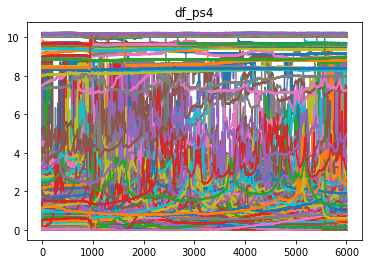

6.25 seconds


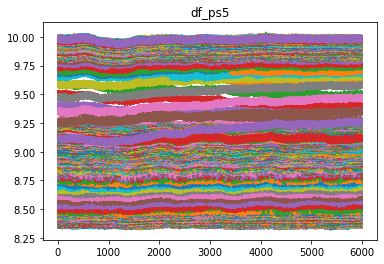

12.546875 seconds


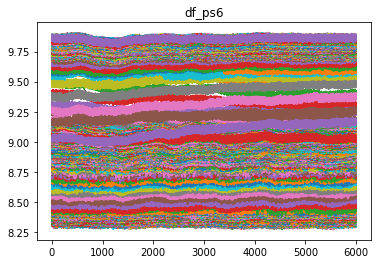

13.046875 seconds


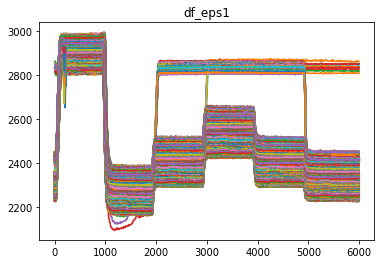

9.125 seconds


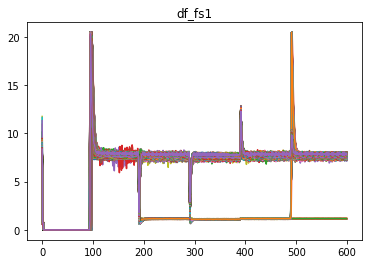

4.8125 seconds


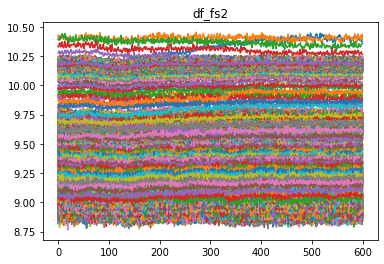

5.28125 seconds


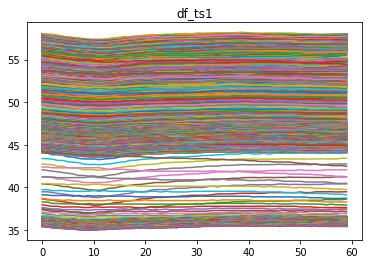

3.109375 seconds


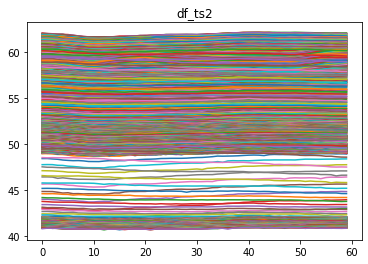

4.21875 seconds


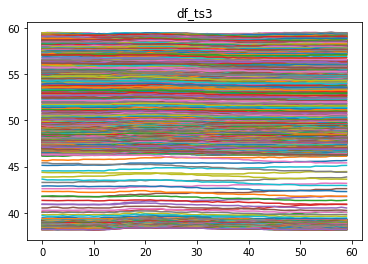

2.53125 seconds


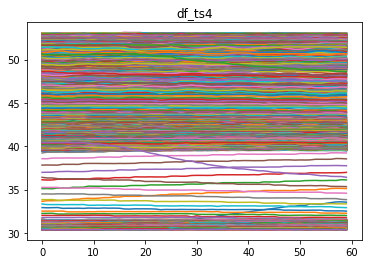

2.609375 seconds


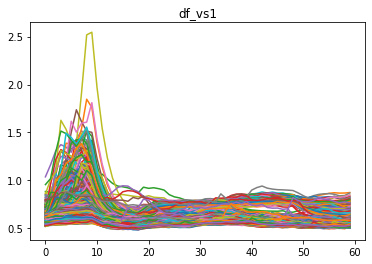

2.25 seconds


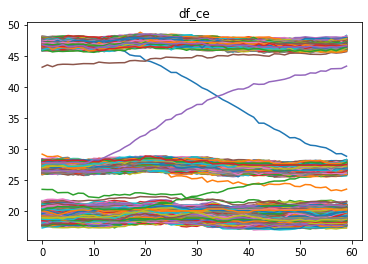

2.171875 seconds


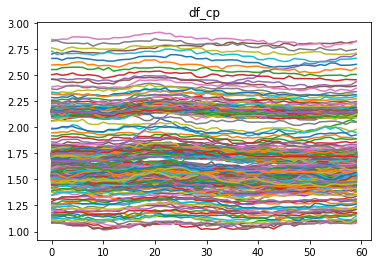

2.234375 seconds


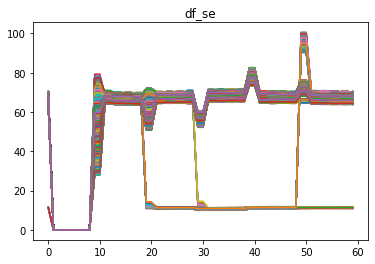

2.4375 seconds


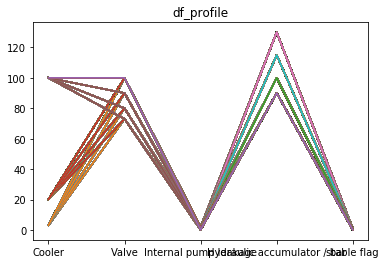

2.3125 seconds


In [48]:
import matplotlib.pyplot as plt
import time

for df in data_list:
    start_time = time.process_time()
    plt.figure()
    plt.title(retrieve_name(df))
    plt.plot(df.T)
    plt.show()
    
    end_time = time.process_time()
    print(end_time - start_time, "seconds")

In [51]:
df_profile

,Cooler,Valve,Internal pump leakage,Hydraulic accumulator,stable flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1
...,...,...,...,...,...
2200,100,100,0,90,0
2201,100,100,0,90,0
2202,100,100,0,90,0
2203,100,100,0,90,0


In [69]:
# Cooler condition / %:
cooler_fail = df_profile['Cooler'] == 3
cooler_reduced = df_profile['Cooler'] == 20
cooler_full = df_profile['Cooler'] == 100

# Valve condition / %
valve_optimal = df_profile['Valve'] == 100
valve_small_lag = df_profile['Valve'] == 90
valve_severe_lag = df_profile['Valve'] == 80
valve_near_failure = df_profile['Valve'] == 73

# Internal pump leakage
pump_ok = df_profile['Internal pump leakage'] == 0
pump_small_leakage = df_profile['Internal pump leakage'] == 1
pump_severe_leakage = df_profile['Internal pump leakage'] == 2

# Hydraulic accumulator / bar
hydraulic_optimal = df_profile['Hydraulic accumulator'] == 130
hydraulic_slight_reduced = df_profile['Hydraulic accumulator'] == 115
hydraulic_severely_reduced = df_profile['Hydraulic accumulator'] == 100
hydraulic_near_failure = df_profile['Hydraulic accumulator'] == 90

# Stable Flag
stable_conditions = df_profile['stable flag'] == 0
stable_not = df_profile['stable flag'] == 1

In [70]:
df_ce[stable_not]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,31.554,30.953,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,23.995,24.328,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,21.711,21.564,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,20.687,20.703,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,19.887,19.919,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,47.172,47.124,47.149,47.231,47.256,47.370,47.360,47.513,47.219,47.009,...,47.009,47.065,46.984,46.986,46.984,47.022,47.009,46.986,47.001,47.185
2072,47.139,47.102,47.152,47.148,47.397,47.349,47.374,47.360,47.430,47.281,...,47.030,46.949,47.023,47.093,46.939,46.998,46.986,46.939,46.986,47.042
2073,47.186,47.102,47.056,47.091,47.079,47.373,47.314,47.185,47.116,47.023,...,46.773,46.986,46.678,46.725,47.194,47.265,47.192,47.349,47.300,47.452
2114,46.766,46.800,46.754,46.839,46.937,47.019,47.026,47.026,46.910,46.631,...,46.911,46.613,46.649,46.604,46.604,46.738,46.981,47.063,47.018,47.074


# Machine Learning

In [ ]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance